<a href="https://colab.research.google.com/github/ryan1234abbas/Diabetes/blob/main/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score, f1_score, recall_score, precision_score

In [ ]:
df = pd.read_csv('diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum() # 0 null values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
corr = df.corr()["Outcome"]
corr

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
ncorr = corr[corr < 0]
ncorr.count() # 0 negative values, so use whole data set

0

In [ ]:
print(f"Avg number of pregnancies is: {round(df['Pregnancies'].sum() / df.shape[0])}")

print(f"Max number of pregnancies for someone who is diabetic is {df[df['Outcome'] == 1]['Pregnancies'].max()}")
print(f"Max number of pregnancies for someone who is non-diabetic is {df[df['Outcome'] == 0]['Pregnancies'].max()}")


print(f"Avg glucose level is: {round(df['Glucose'].sum() / df.shape[0])}")
print(f"Avg blood pressure is: {round(df['BloodPressure'].sum() / df.shape[0])}")
print(f"Avg skin thickness is: {round(df['SkinThickness'].sum() / df.shape[0])}")
print(f"Avg insulin level is: {round(df['Insulin'].sum() / df.shape[0])}")

Avg number of pregnancies is: 4
Max number of pregnancies for someone who is diabetic is 17
Max number of pregnancies for someone who is non-diabetic is 13
Avg glucose level is: 121
Avg blood pressure is: 69
Avg skin thickness is: 21
Avg insulin level is: 80


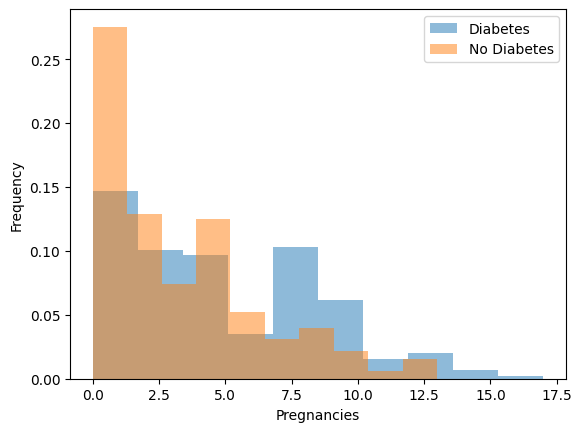

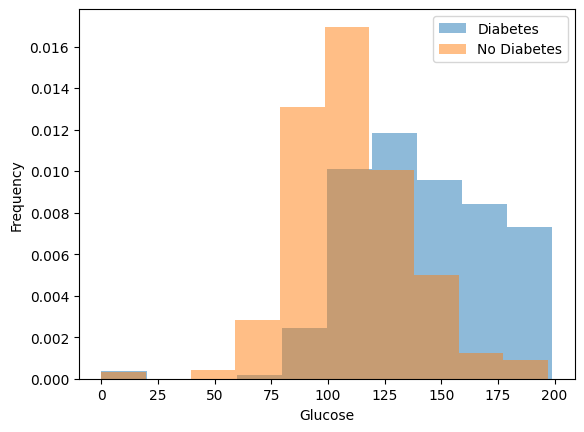

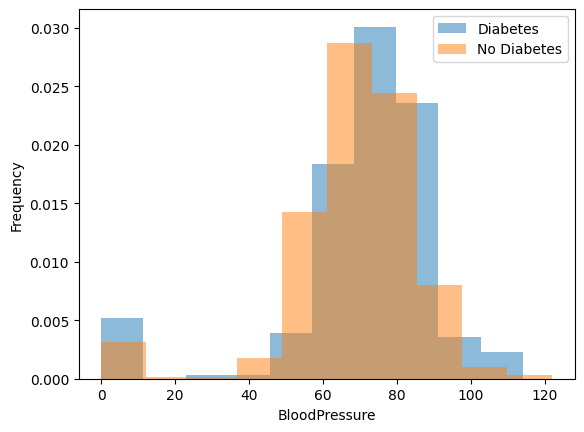

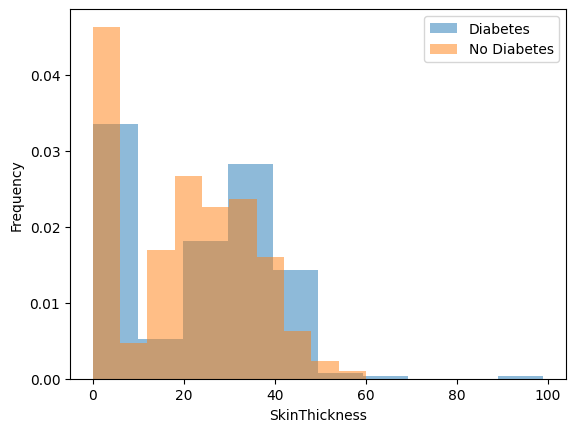

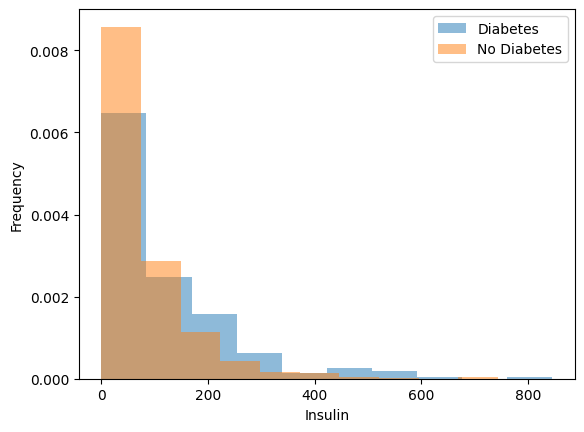

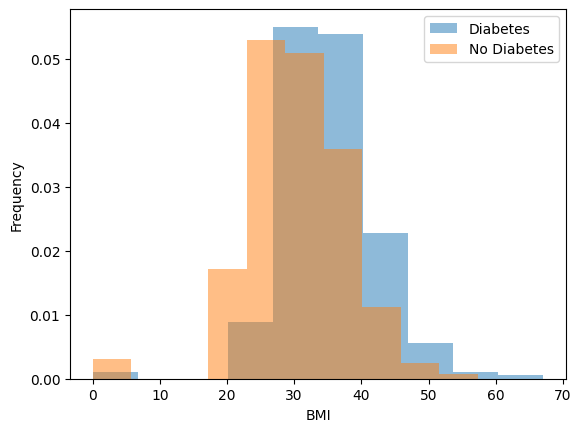

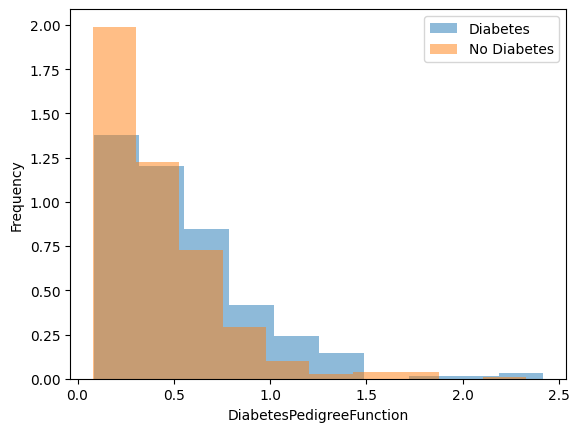

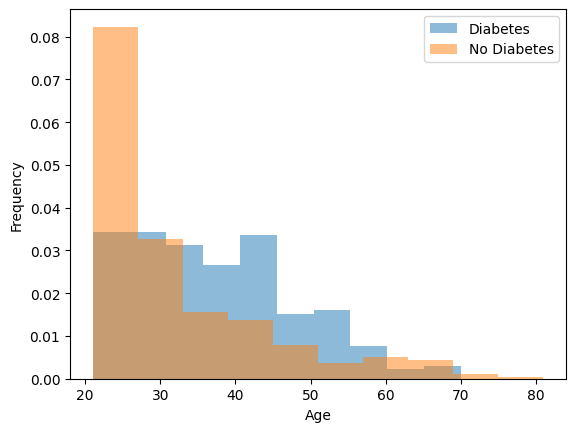

In [ ]:
#create visualizations
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df["Outcome"] == 1][label], alpha = 0.5, density = True)
  plt.hist(df[df["Outcome"] == 0][label], alpha = 0.5, density = True)
  plt.xlabel(label)
  plt.legend(["Diabetes", "No Diabetes"])
  plt.ylabel("Frequency")
  plt.show()


In [ ]:
X = df[df.columns[:-1]]
y = df["Outcome"]

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
len(df[df["Outcome"] == 0]), len(df[df["Outcome"] == 1])

(500, 268)

In [ ]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
len(y[y == 0]), len(y[y == 1])

(500, 500)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [ ]:
#let's try random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred2 = rf.predict(x_test)

In [ ]:
accuracy_score(ypred2, y_test)

0.8433333333333334

In [ ]:
#use gridsearchcv
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "n_estimators": [50,100,200],
    "max_depth": [None,15,20,25],
    "min_samples_split": [12,8,10],
    "min_samples_leaf": [1,2,4]
}
gs = GridSearchCV(rf,param_grid=param_grid,cv=5, scoring = "accuracy")
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [12, 8, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 200}

In [ ]:
g = gs.best_estimator_
pred3 = g.predict(x_test)
accuracy_score(pred3,y_test)

0.8133333333333334

In [ ]:
print(f"F1-Score is: { round(f1_score(pred3,y_test) * 100)}%")
print(f"Recall-Score is: { round(recall_score(pred3,y_test) * 100)}%")
print(f"Precision-Score is: { round(precision_score(pred3,y_test) * 100)}%")

F1-Score is: 82%
Recall-Score is: 79%
Precision-Score is: 85%


In [ ]:
#use tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data= (x_val, y_val))

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5433 - loss: 0.6868 - val_accuracy: 0.6714 - val_loss: 0.6134
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7877 - loss: 0.5503 - val_accuracy: 0.7048 - val_loss: 0.5667
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7538 - loss: 0.5058 - val_accuracy: 0.7476 - val_loss: 0.5405
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7641 - loss: 0.4749 - val_accuracy: 0.7429 - val_loss: 0.5317
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7630 - loss: 0.4815 - val_accuracy: 0.7429 - val_loss: 0.5325
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7933 - loss: 0.4341 - val_accuracy: 0.7286 - val_loss: 0.5284
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7792 - loss: 0.4470 - val_accuracy: 0.7095 - val_loss: 0.5315
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7734 - loss: 0.4276 - val_accuracy: 0.7048 - val_loss

In [ ]:
model.evaluate(x_test,y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.4653 


[0.4534669518470764, 0.7866666913032532]